# Lab02: Geographic Data / Maps
![Map](http://geopandas.org/_images/world_randomcolors.png)

In [2]:
import pip
!pip install geopandas descartes

[GeoPandas](http://geopandas.org/) is an open source project to make working with geospatial data in python easier. GeoPandas **extends the datatypes used by pandas** to allow spatial operations on geometric types. 

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

## Data Structures
Similarly to pandas, GeoPandas provides two data structures for working with geographic data:
* GeoDataFrame
* GeoSeries

### GeoSeries
A `GeoSeries` is essentially a vector where each entry in the vector is a set of shapes corresponding to one observation. An entry may consist of only one shape (like a single polygon) or multiple shapes that are meant to be thought of as one observation (like the many polygons that make up the State of Hawaii or a country like Indonesia).
* Points/Multi-Points
* Lines/Multi-Lines
* Polygons/Multi-Polygons

### GeoDataFrame
A ``GeoDataFrame`` is a tabular data structure that contains a ``GeoSeries``.

The most important property of a ``GeoDataFrame`` is that it always has one ``GeoSeries`` column that holds a special status. This ``GeoSeries`` is referred to as the ``GeoDataFrame``'s "geometry". When a spatial method is applied to a ``GeoDataFrame`` (or a spatial attribute like area is called), this commands will always act on the "geometry" column.

In [4]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


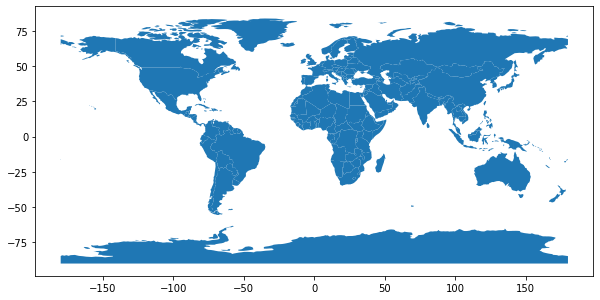

In [5]:
world.plot(figsize=(10,10))
plt.show()

Let's visualize only the centers of each country:

<ipython-input-6-e4e161275d23>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world['centroid_column'] = world.centroid


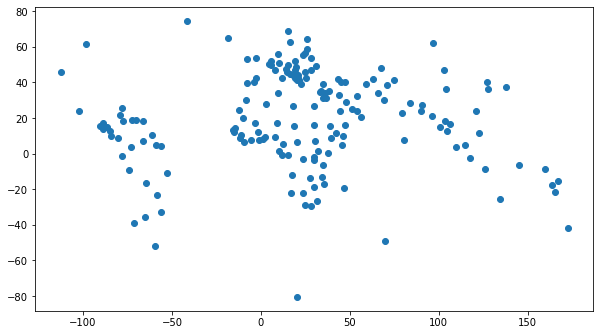

In [6]:
world['centroid_column'] = world.centroid
world = world.set_geometry('centroid_column')
world.plot(figsize=(10,10))
plt.show()

Now, we are switching the geometry back again.

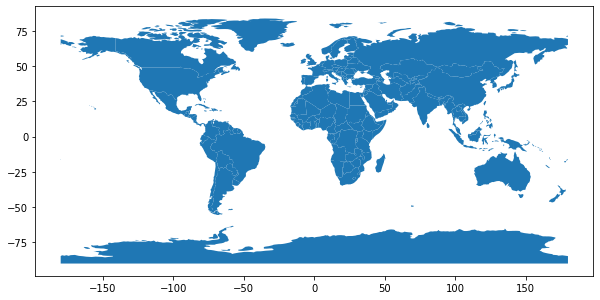

In [7]:
world = world.set_geometry('geometry')
world.plot(figsize=(10,10))
plt.show()

## Show me some data!

In [8]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,centroid_column
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",POINT (163.85316 -17.31631)
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",POINT (34.75299 -6.25773)
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",POINT (-12.13783 24.29117)
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",POINT (-98.14238 61.46908)
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",POINT (-112.59944 45.70563)


<AxesSubplot:>

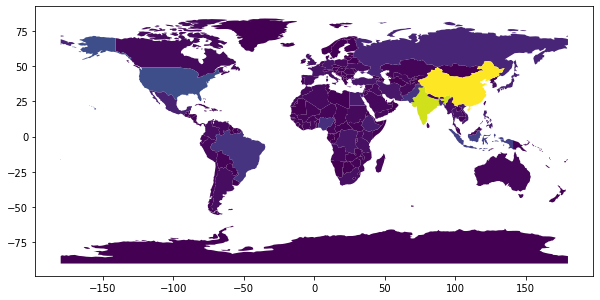

In [9]:
world.plot(column='pop_est', figsize=(10,10))

### Focus on Europe

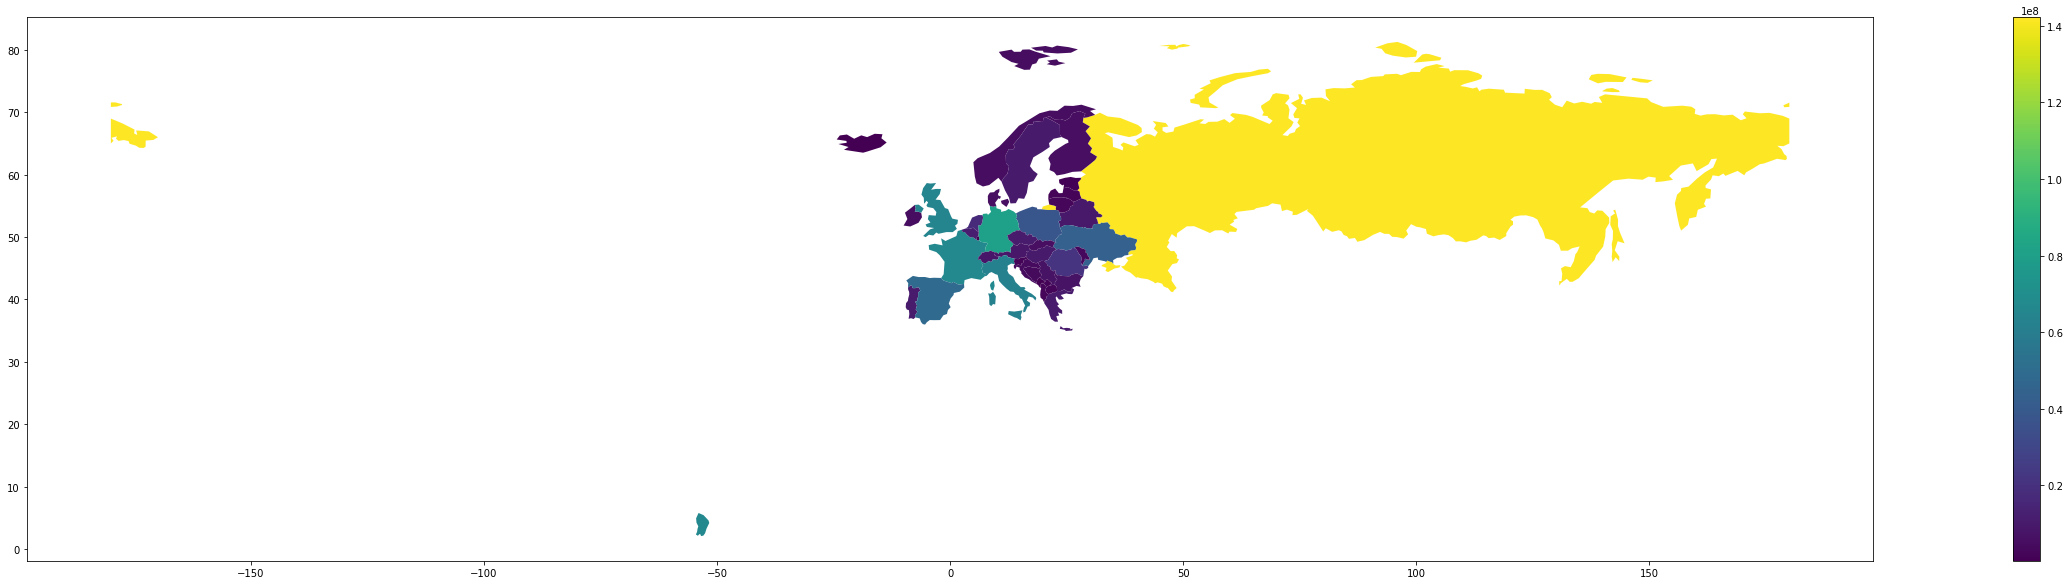

In [10]:
europe = world.loc[world['continent'] == 'Europe', :]
europe.plot(column='pop_est', figsize=(50,10), legend=True)
plt.show()

 
### Can I use my own data?
Sure. What about **worldwide internet usage** (as % of population)? This data is available at the [World Bank Open Data](https://data.worldbank.org/) site.

The file `internet_usage.csv` can be found in the eLearning course.

In [187]:
df = pd.read_csv('https://raw.githubusercontent.com/ADSLab-Salzburg/DataAnalysiswithPython/main/data/internet_usage.csv', skiprows=3)
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,74.000000,78.900000,83.780000,88.661227,93.542454,97.170000,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.940634,10.552158,13.052010,15.990277,17.165587,20.332119,23.657366,26.448284,NaN,NaN
2,Afghanistan,AFG,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.454545,5.900000,7.000000,8.260000,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,10.335555,12.901207,15.470625,19.421850,21.369414,24.676247,29.741679,32.418191,NaN,NaN
4,Angola,AGO,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.500000,8.900000,21.400000,29.000000,29.000000,32.000000,35.000000,36.000000,NaN,NaN


Get some information about the data. Use a method to get some stats (mean, count, standard deviation, percentiles, etc.) from the data frame. Hint: it is the same function as with the pandas dataframe.

In [12]:
df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
count,7.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,...,246.000000,246.000000,244.000000,241.000000,243.000000,242.000000,173.000000,174.000000,75.000000,0.0
mean,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,38.596089,40.996653,43.723177,47.126527,50.354506,54.201263,58.989973,61.996830,80.990743,NaN
std,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,27.513328,28.022251,27.996541,27.632915,27.825226,27.362376,26.372645,25.621035,14.496306,NaN
min,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.990000,1.083733,1.177119,1.308907,5.000000,5.200000,10.400000,NaN
25%,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,11.133685,13.466594,16.950000,20.439528,24.575521,28.279416,35.000000,39.750000,73.180509,NaN
50%,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,36.158753,39.212994,41.669859,47.569760,53.000970,58.447748,64.336108,68.124002,83.055591,NaN
75%,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,61.478119,65.360000,68.187500,71.064068,75.188889,78.558053,80.726843,82.837533,90.361501,NaN
max,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,96.209800,96.546800,98.160000,98.323610,98.240016,99.546612,99.652849,99.701493,100.000000,NaN


Hmm.. A lot of missing data. Get rid of the missing values and describe it again.

In [13]:
df.dropna(axis='columns', how='all', inplace=True)
df.describe()

,1960,1965,1970,1975,1976,1977,1978,1979,1980,1981,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,252.000000,246.000000,246.000000,244.000000,241.000000,243.000000,242.000000,173.000000,174.000000,75.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,35.731808,38.596089,40.996653,43.723177,47.126527,50.354506,54.201263,58.989973,61.996830,80.990743
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26.821806,27.513328,28.022251,27.996541,27.632915,27.825226,27.362376,26.372645,25.621035,14.496306
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.990000,1.083733,1.177119,1.308907,5.000000,5.200000,10.400000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.950000,11.133685,13.466594,16.950000,20.439528,24.575521,28.279416,35.000000,39.750000,73.180509
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,32.605525,36.158753,39.212994,41.669859,47.569760,53.000970,58.447748,64.336108,68.124002,83.055591
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,56.175000,61.478119,65.360000,68.187500,71.064068,75.188889,78.558053,80.726843,82.837533,90.361501
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,94.819687,96.209800,96.546800,98.160000,98.323610,98.240016,99.546612,99.652849,99.701493,100.000000


Now, we are only interested in the data from 2017. Extract those with additional County Name and -Code.

In [14]:
df = df.loc[:, ['Country Name', 'Country Code', '2017']]
df.head()

,Country Name,Country Code,2017
0,Aruba,ABW,97.170000
1,Africa Eastern and Southern,AFE,20.332119
2,Afghanistan,AFG,NaN
3,Africa Western and Central,AFW,24.676247
4,Angola,AGO,32.000000


Check if and how many missing values are in the 2017 data.

In [15]:
df['2017'].isna().sum()

24

### Merge the two datasets
We need to merge the two datasets, so that we have the shape and the internet usage value for each country. Merging can only be done based on columns with equal values. In our case, this can be the **country name**.

In [16]:
merge = world.set_index('iso_a3').join(df.set_index('Country Code'))
merge.head()

,pop_est,continent,name,gdp_md_est,geometry,centroid_column,Country Name,2017
-99,5320045,Europe,Norway,364700.0,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80...",POINT (15.46812 69.15686),NaN,NaN
-99,67106161,Europe,France,2699000.0,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",POINT (-2.87670 42.46070),NaN,NaN
-99,265100,Asia,N. Cyprus,3600.0,"POLYGON ((32.73178 35.14003, 32.80247 35.14550...",POINT (33.55829 35.27396),NaN,NaN
-99,3500000,Africa,Somaliland,12250.0,"POLYGON ((48.94820 11.41062, 48.94820 11.41062...",POINT (46.23075 9.75797),NaN,NaN
-99,1895250,Europe,Kosovo,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",POINT (20.89536 42.57937),NaN,NaN


### Plot internet usage
Now plot the 2017 internet usage for each country in a world map

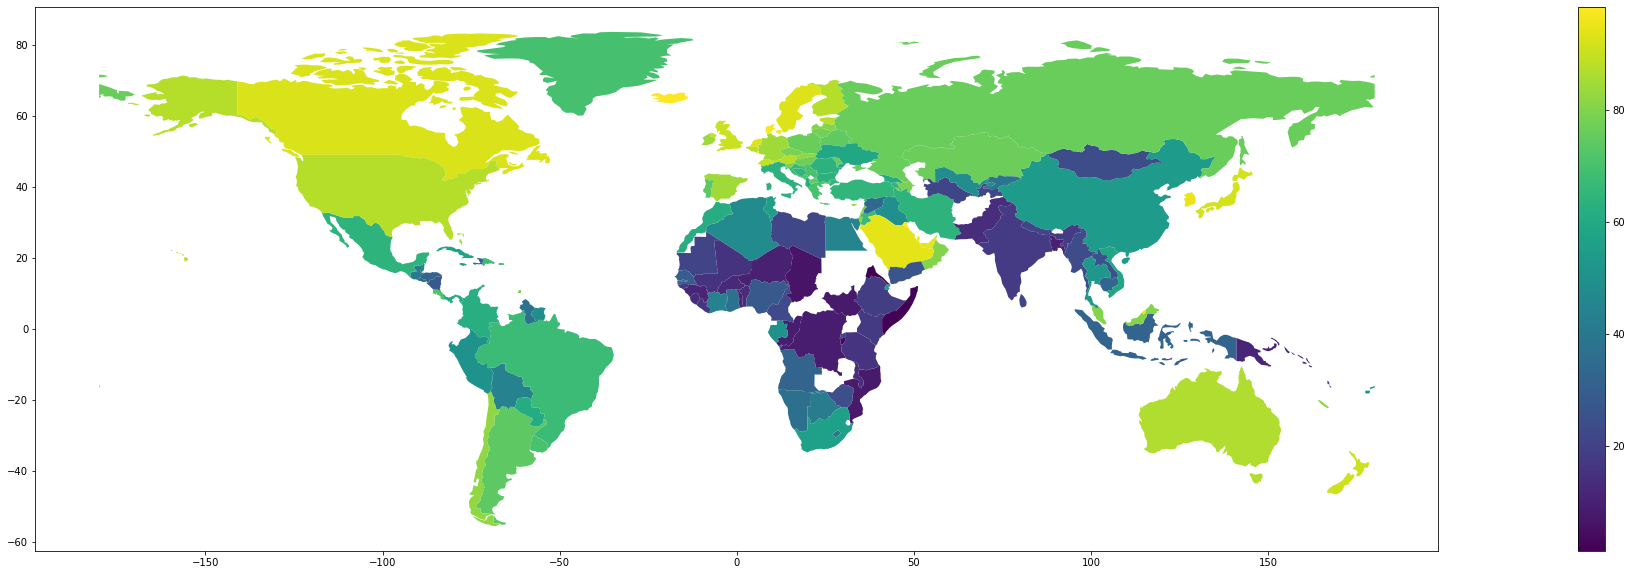

In [17]:
# YOUR CODE HERE
merge.plot(column='2017', figsize=(50,10), legend=True)
plt.show()

## TASK 1:  Plot European Internet usage

Merge the ``europe`` GeoDataFrame (european countries only) with the internet usage data in ``df`` and plot the result.

In [18]:
# YOUR CODE HERE
mergeEurope = europe.set_index('iso_a3').join(df.set_index('Country Code'))

mergeEurope.head()

,pop_est,continent,name,gdp_md_est,geometry,centroid_column,Country Name,2017
-99,5320045,Europe,Norway,364700.0,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80...",POINT (15.46812 69.15686),NaN,NaN
-99,67106161,Europe,France,2699000.0,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",POINT (-2.87670 42.46070),NaN,NaN
-99,1895250,Europe,Kosovo,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",POINT (20.89536 42.57937),NaN,NaN
ALB,3047987,Europe,Albania,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",POINT (20.03243 41.14135),Albania,62.400000
AUT,8754413,Europe,Austria,416600.0,"POLYGON ((16.97967 48.12350, 16.90375 47.71487...",POINT (14.07616 47.61395),Austria,87.935587


## What about Cities instead of Countries?

In [19]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


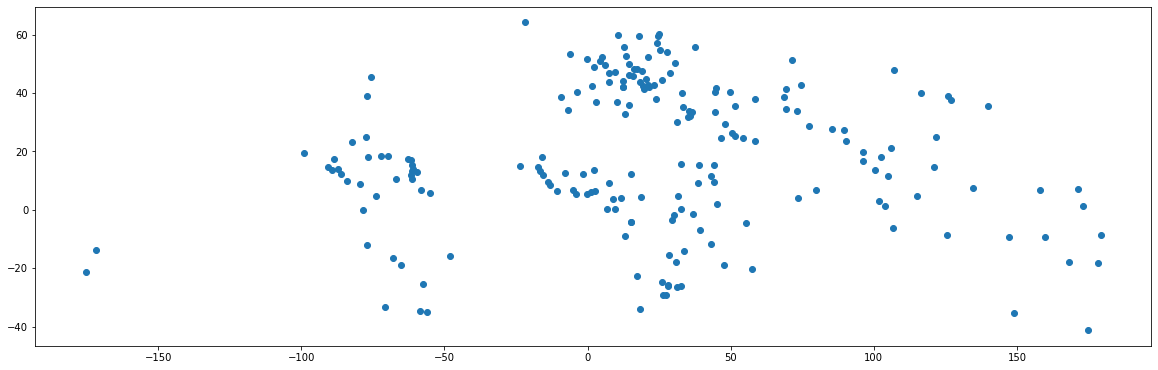

In [20]:
cities.plot(figsize=(20,10))
plt.show()

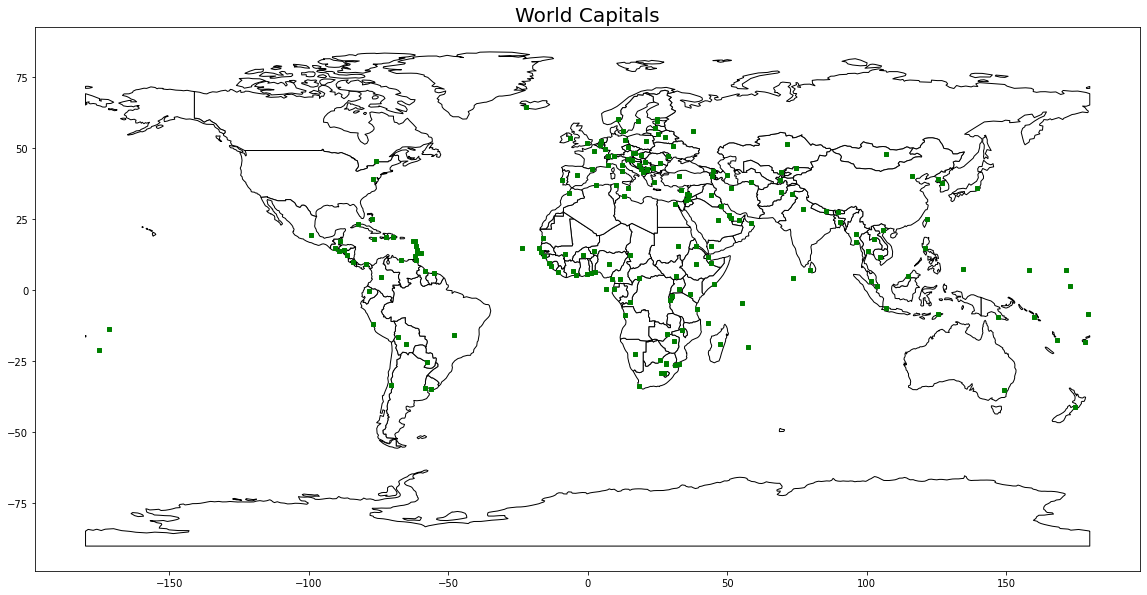

In [21]:
base = world.plot(color='white', edgecolor='black', figsize=(20,10))
cities.plot(ax=base, marker='s', color='green', markersize=10)
plt.title('World Capitals', fontsize=20)
plt.show()

## TASK 2: Plot a map with new data.

Go to the [World Bank Open Data](https://data.worldbank.org/) site. Find and download a new data set. Use this dataset to visualize a new map.

Text(0.5, 1.0, 'Trading Costs Agriculture from Austria')

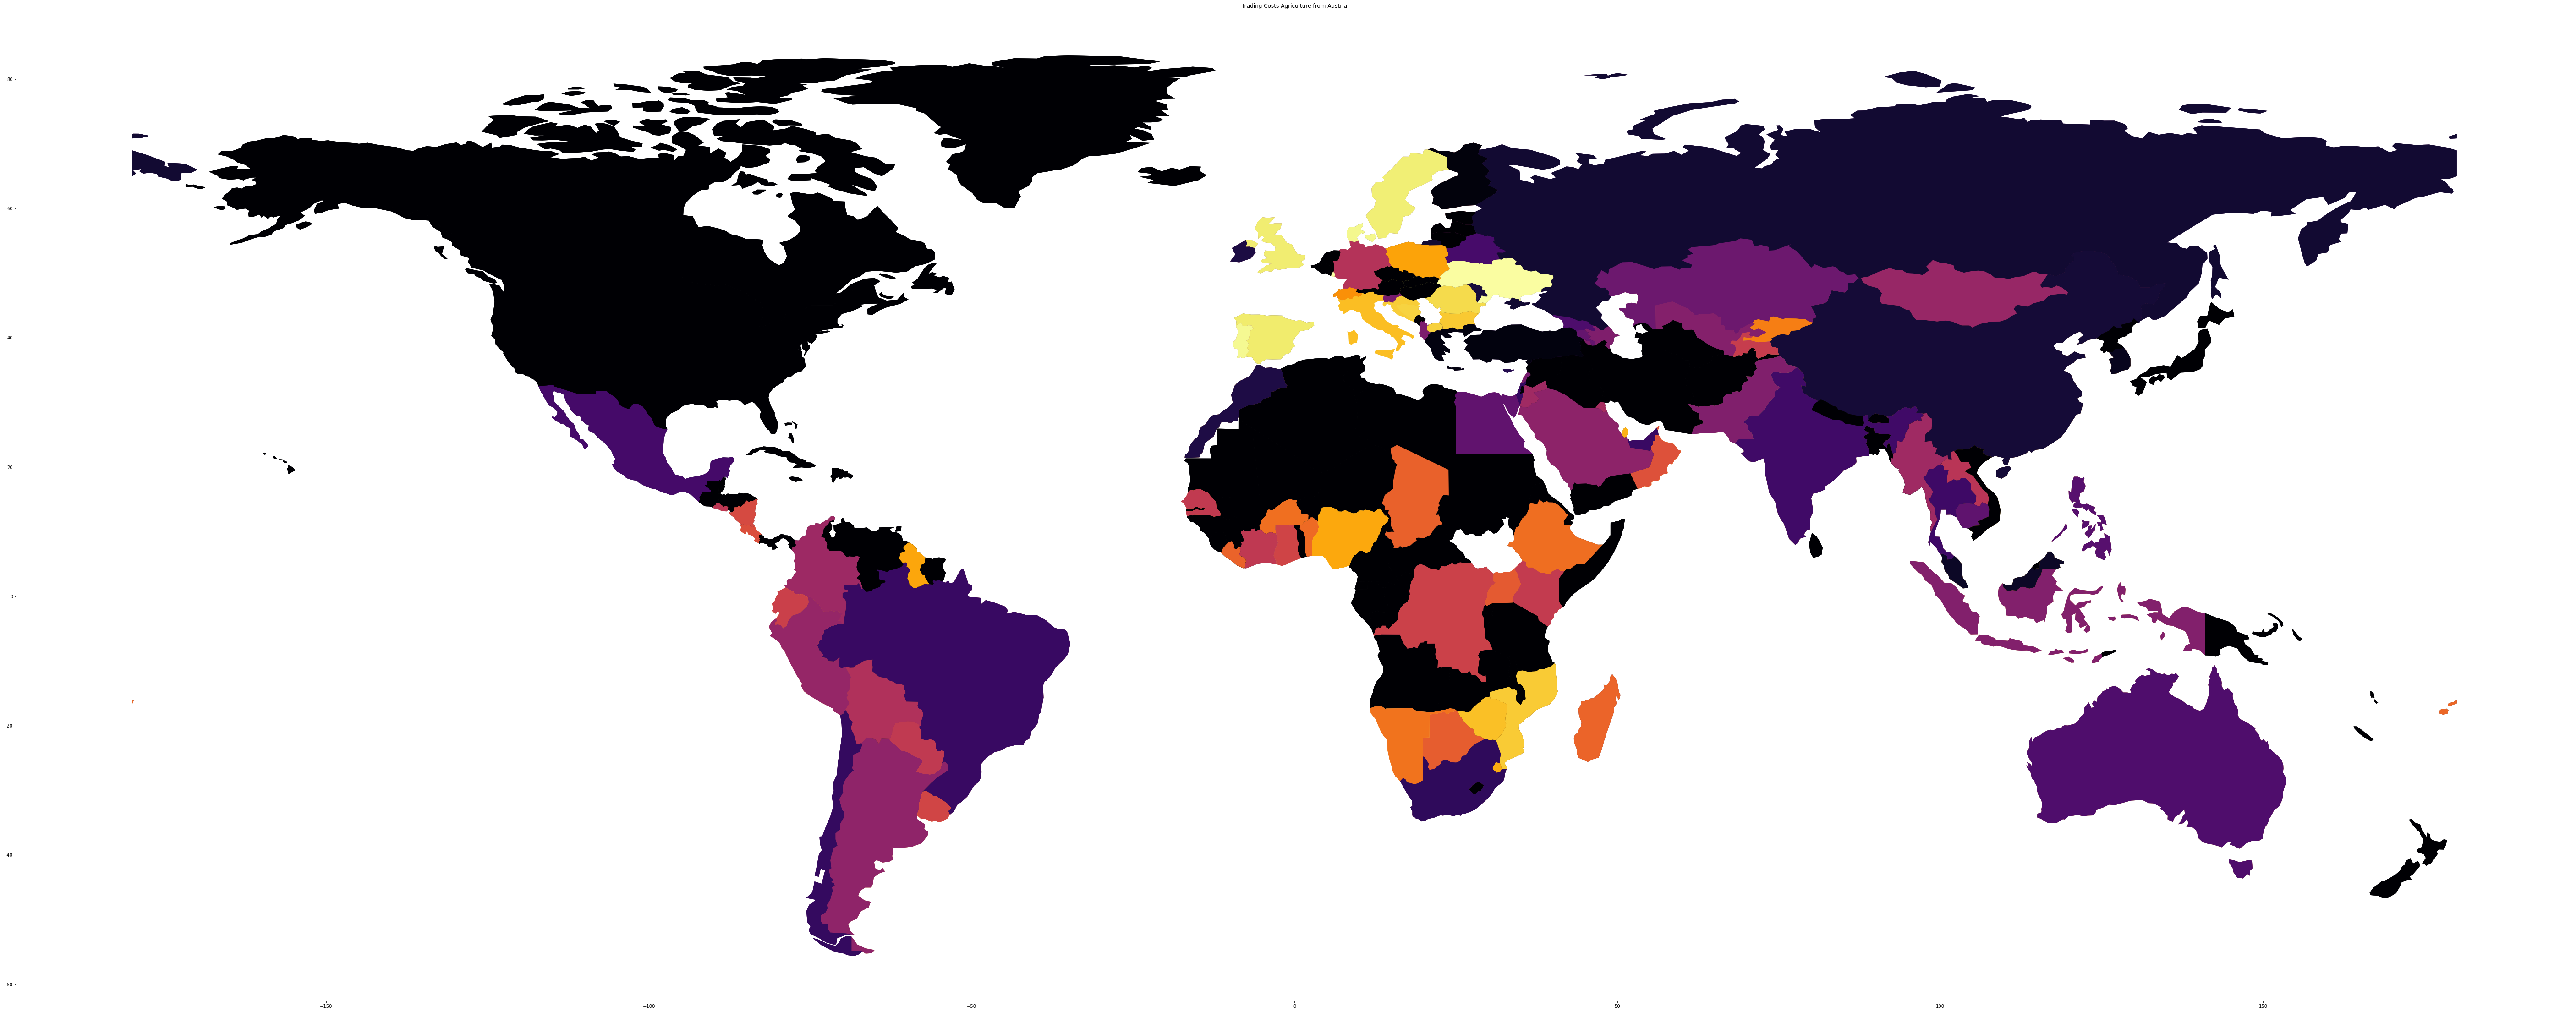

In [185]:
# YOUR CODE HERE
dfTrade = pd.read_csv('https://raw.githubusercontent.com/s-naegele/Data-Analysis/main/Lab/TradingCostsAustria.csv')
agricultureTrade = dfTrade.loc[:, ['Partner Name', 'Partner Code', 'Sector', '2018 [YR2018]']]
agricultureTrade.loc[agricultureTrade.Sector=='Agriculture']
agricultureTrade.fillna(0)
agricultureTrade.head()
mergeAgriTrade =  world.set_index('iso_a3').join(agricultureTrade.set_index('Partner Code'))
mergeAgriTrade.head()
mergeAgriTrade.plot(column='2018 [YR2018]',figsize=(100,50), cmap= 'inferno') 
plt.title('Trading Costs Agriculture from Austria')

## TASK3: Plot Internet Usage of a Single Country over Time
Use a country of your choice! You can use a simple lineplot for this task.

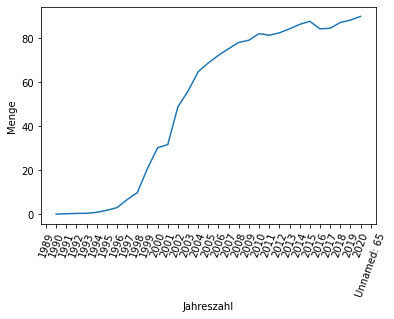

In [37]:
# YOUR CODE HERE
import seaborn as sns
df2 = pd.read_csv('https://raw.githubusercontent.com/ADSLab-Salzburg/DataAnalysiswithPython/main/data/internet_usage.csv', skiprows=3)
mergeWorld = world.set_index('iso_a3').join(df2.set_index('Country Code'))
germany = mergeWorld.loc[mergeWorld['name'] == 'Germany',:]
germany = germany.drop(columns =['pop_est','continent','name','gdp_md_est','geometry','centroid_column','Country Name','Indicator Name','Indicator Code'])
germany = pd.melt(germany)
sns.lineplot(data = germany, x='variable', y='value');
plt.xlabel('Jahreszahl');
plt.ylabel('Menge')
plt.xticks(rotation= 70)
plt.show()


### Futher Reading
[GeoPandas documentation](http://geopandas.org/)

## Finished
You are done! Don't forget to submit using the eLearning system.
